In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

### Reading and Analysing Dataset

In [ ]:
df = pd.read_csv('data.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/train.csv'

In [ ]:
df.describe()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.515873,0.460317,0.519841,0.547619,0.519841,0.503968,0.480159,0.496032,0.452381,0.468254,...,0.246032,0.170635,0.198413,0.178571,0.182540,0.202381,0.154762,0.170635,0.119048,0.123016
std,0.500743,0.499415,0.500600,0.498718,0.500600,0.500979,0.500600,0.500979,0.498718,0.499984,...,0.431554,0.376938,0.399598,0.383755,0.387057,0.402574,0.362397,0.376938,0.324489,0.329109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sudden_fever           252 non-null    int64 
 1   headache               252 non-null    int64 
 2   mouth_bleed            252 non-null    int64 
 3   nose_bleed             252 non-null    int64 
 4   muscle_pain            252 non-null    int64 
 5   joint_pain             252 non-null    int64 
 6   vomiting               252 non-null    int64 
 7   rash                   252 non-null    int64 
 8   diarrhea               252 non-null    int64 
 9   hypotension            252 non-null    int64 
 10  pleural_effusion       252 non-null    int64 
 11  ascites                252 non-null    int64 
 12  gastro_bleeding        252 non-null    int64 
 13  swelling               252 non-null    int64 
 14  nausea                 252 non-null    int64 
 15  chills                 

<AxesSubplot:>

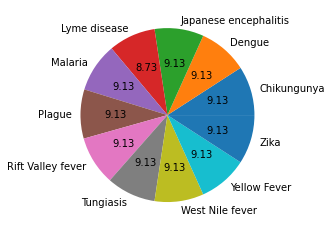

In [ ]:
df.groupby('prognosis').size().plot(kind='pie', autopct='%.2f',label='')

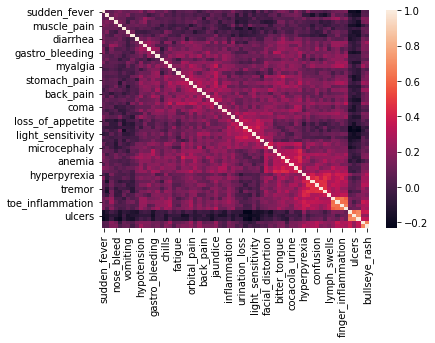

In [ ]:
sns.heatmap(df.corr())
plt.show()

# Feature selection

speech_problem    1.479529e-30
bullseye_rash     5.462412e-30
toenail_loss      3.417364e-28
ulcers            6.245624e-26
itchiness         2.056296e-25
                      ...     
rash              8.582283e-02
mouth_bleed       1.257875e-01
vomiting          1.738650e-01
muscle_pain       2.200208e-01
joint_pain        3.209356e-01
Length: 64, dtype: float64


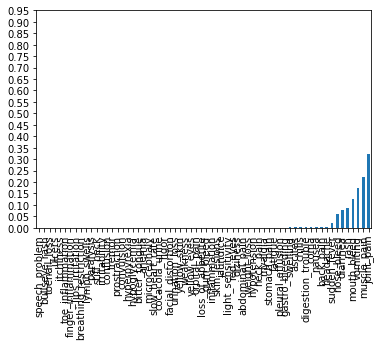

Uninformative columns:
 sudden_fever    0.022979
nose_bleed      0.060156
diarrhea        0.078984
rash            0.085823
mouth_bleed     0.125788
vomiting        0.173865
muscle_pain     0.220021
joint_pain      0.320936
dtype: float64


In [ ]:
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(df.drop(columns=['prognosis']), df['prognosis'])
p_values = pd.Series(chi2_selector.pvalues_)
p_values.index=df.drop(columns=['prognosis']).columns
p_values.sort_values(ascending=True,inplace=True)
print(p_values)
p_values.plot.bar()
plt.yticks([i/20 for i in range(20)])
plt.show()
print('Uninformative columns:\n',p_values[p_values>0.01])


In [ ]:
df_p_5 = df.drop(columns=['joint_pain','muscle_pain','vomiting','mouth_bleed','rash','diarrhea','nose_bleed'])
df_p_1 = df.drop(columns=['joint_pain','muscle_pain','vomiting','mouth_bleed','rash','diarrhea','nose_bleed','sudden_fever'])
df_p_10 = df.drop(columns=['joint_pain','muscle_pain','vomiting','mouth_bleed'])
df_p_20 = df.drop(columns=['joint_pain','muscle_pain'])

### Split Data in Train & Test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['prognosis']),df.prognosis,test_size=0.3)
X_train_20,X_test_20,y_train_20,y_test_20 = train_test_split(df_p_20.drop(columns=['prognosis']),df_p_20.prognosis,test_size=0.3)
X_train_10,X_test_10,y_train_10,y_test_10 = train_test_split(df_p_10.drop(columns=['prognosis']),df_p_10.prognosis,test_size=0.3)
X_train_5,X_test_5,y_train_5,y_test_5 = train_test_split(df_p_5.drop(columns=['prognosis']),df_p_5.prognosis,test_size=0.3)
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(df_p_1.drop(columns=['prognosis']),df_p_1.prognosis,test_size=0.3)

## Logistic Regression

In [ ]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train,y_train)
print('Train data:')
print(classification_report(lr.predict(X_train),y_train))
print('Test data:')
print(classification_report(lr.predict(X_test),y_test))
import warnings
warnings.filterwarnings('ignore')

Train data:
                       precision    recall  f1-score   support

          Chikungunya       1.00      1.00      1.00        19
               Dengue       1.00      1.00      1.00        20
Japanese encephalitis       1.00      1.00      1.00        15
         Lyme disease       1.00      1.00      1.00        16
              Malaria       1.00      1.00      1.00        12
               Plague       1.00      1.00      1.00        17
    Rift Valley fever       1.00      1.00      1.00        14
            Tungiasis       1.00      1.00      1.00        17
      West Nile fever       1.00      1.00      1.00        14
         Yellow Fever       1.00      1.00      1.00        15
                 Zika       1.00      1.00      1.00        17

             accuracy                           1.00       176
            macro avg       1.00      1.00      1.00       176
         weighted avg       1.00      1.00      1.00       176

Test data:
                       precis

C:\Users\intel 3\anaconda3\envs\tsf\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
parameters = {'criterion':['entropy','gini'],'min_samples_split':[3,5,10,15],'max_depth':[5,10,20,30,50,65]}
gcv = GridSearchCV(rf,parameters).fit(X_train,y_train)
print(gcv.best_params_)

{'criterion': 'gini', 'max_depth': 65, 'min_samples_split': 5}


In [ ]:
rf = RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=5).fit(X_train,y_train)
print(classification_report(rf.predict(X_train),y_train))
print(classification_report(rf.predict(X_test),y_test))

                       precision    recall  f1-score   support

          Chikungunya       1.00      1.00      1.00        19
               Dengue       1.00      1.00      1.00        20
Japanese encephalitis       1.00      1.00      1.00        15
         Lyme disease       1.00      1.00      1.00        16
              Malaria       1.00      1.00      1.00        12
               Plague       1.00      1.00      1.00        17
    Rift Valley fever       1.00      1.00      1.00        14
            Tungiasis       1.00      1.00      1.00        17
      West Nile fever       1.00      1.00      1.00        14
         Yellow Fever       1.00      1.00      1.00        15
                 Zika       1.00      1.00      1.00        17

             accuracy                           1.00       176
            macro avg       1.00      1.00      1.00       176
         weighted avg       1.00      1.00      1.00       176

                       precision    recall  f1-score